# Sheet 2

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import gaussian_kde

## 1 Kernel Density Estimation
(a)

In [3]:
def biweight(x, mu, w):
    """biweight kernel at mean mu, with bandwidth w evaluated at x"""
    #TODO: implement the quartic (biweight) kernel
    return (15 / (16 * w)) * (1 - ((x - mu) / w) ** 2) ** 2

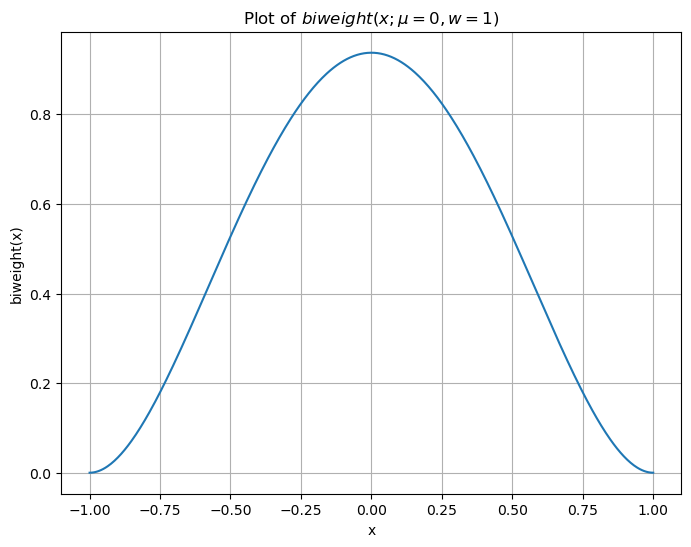

In [ ]:
# TODO plot the kernel
mu = 0
w = 1
x_values = np.linspace(mu-w, mu+w, 500)  


biweight_values = biweight(x_values, mu, w)

plt.figure(figsize=(8, 6))
plt.plot(x_values, biweight_values, label=r"$biweight(x; \mu=0, w=1)$")
plt.xlabel("x")
plt.ylabel("biweight(x)")
plt.title("Plot of $biweight(x; \mu=0, w=1)$")
plt.grid(True)
plt.show()

(b)

In [11]:
# load the data
data = np.load("data/samples.npy")
data50 = data[:50]
print(f'{data.shape=}, {data50.shape=}')

data.shape=(10000,), data50.shape=(50,)


In [64]:
def kde(x, obs, w=1):
    # TODO: implement the KDE with the biweight kernel
    return np.mean([biweight(x, xi, w) for xi in obs if np.abs(x-xi)<=w])

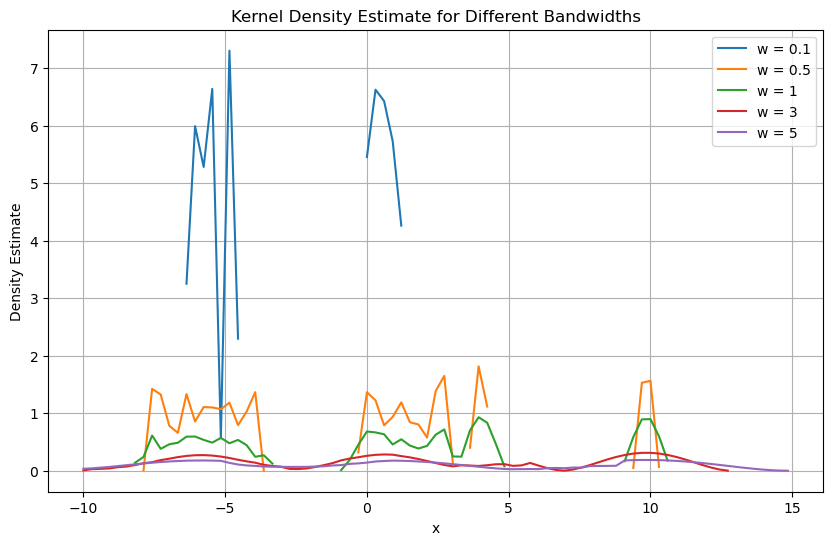

In [65]:
# TODO: compute and plot the kde on the first 50 data points
x_values = np.linspace(-10, 20, 100)
bandwidths = [0.1, 0.5, 1, 3, 5]

plt.figure(figsize=(10, 6))
for w in bandwidths:
    kde_values = [kde(x, data50, w) for x in x_values]
    plt.plot(x_values, kde_values, label=f'w = {w}')

plt.xlabel('x')
plt.ylabel('Density Estimate')
plt.title('Kernel Density Estimate for Different Bandwidths')
plt.legend()
plt.grid(True)
plt.show()

The distribution is discontinuous and has values over 1 for $w<=1$. $w=3$ and $w=5$ are plotted below in an extra plot once more. 

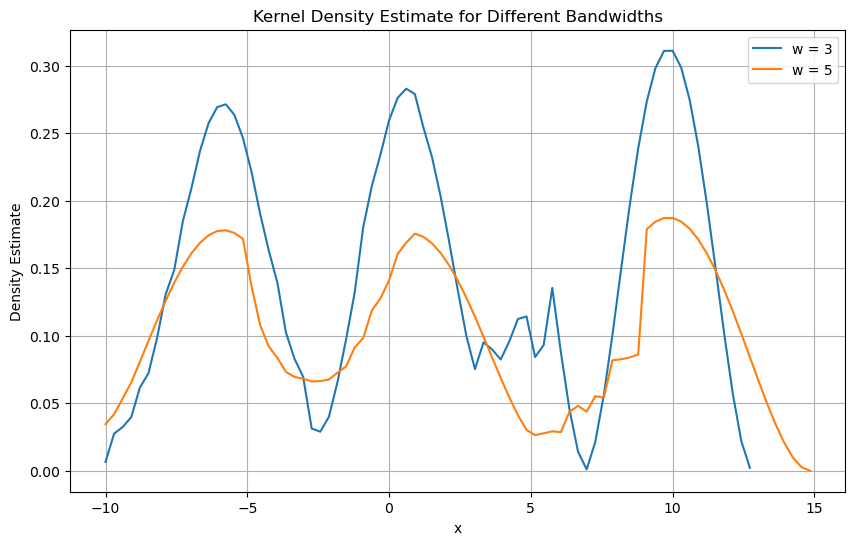

In [ ]:
bandwidths = [3, 5]

plt.figure(figsize=(10, 6))
for w in bandwidths:
    kde_values = [kde(x, data50, w) for x in x_values]
    plt.plot(x_values, kde_values, label=f'w = {w}')

plt.xlabel('x')
plt.ylabel('Density Estimate')
plt.title('Kernel Density Estimate for Different Bandwidths')
plt.legend()
plt.grid(True)
plt.show()

One can see that the bandwitdh influences the smoothness of the density estimate. Larger values make smoother outputs.

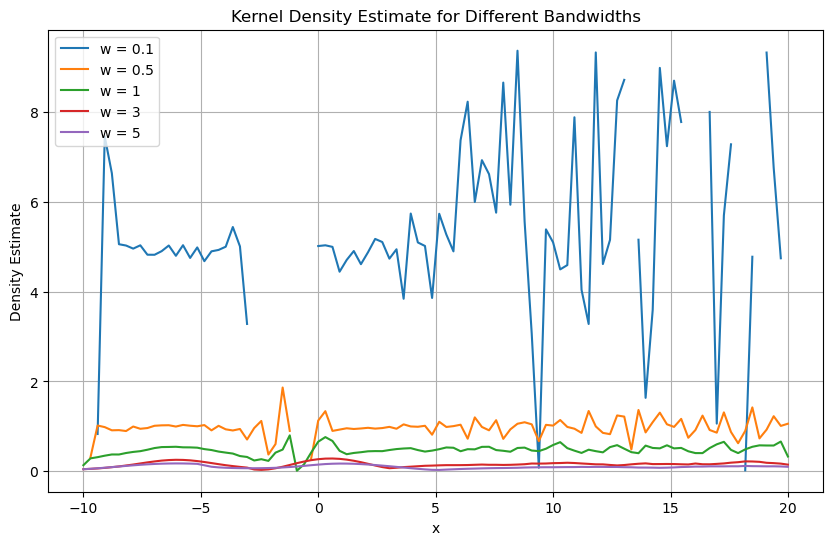

In [ ]:
# TODO: explore what happens when you increase the number of points
bandwidths = [0.1, 0.5, 1, 3, 5]

plt.figure(figsize=(10, 6))
for w in bandwidths:
    kde_values = [kde(x, data, w) for x in x_values]
    plt.plot(x_values, kde_values, label=f'w = {w}')

plt.xlabel('x')
plt.ylabel('Density Estimate')
plt.title('Kernel Density Estimate for Different Bandwidths')
plt.legend()
plt.grid(True)
plt.show()

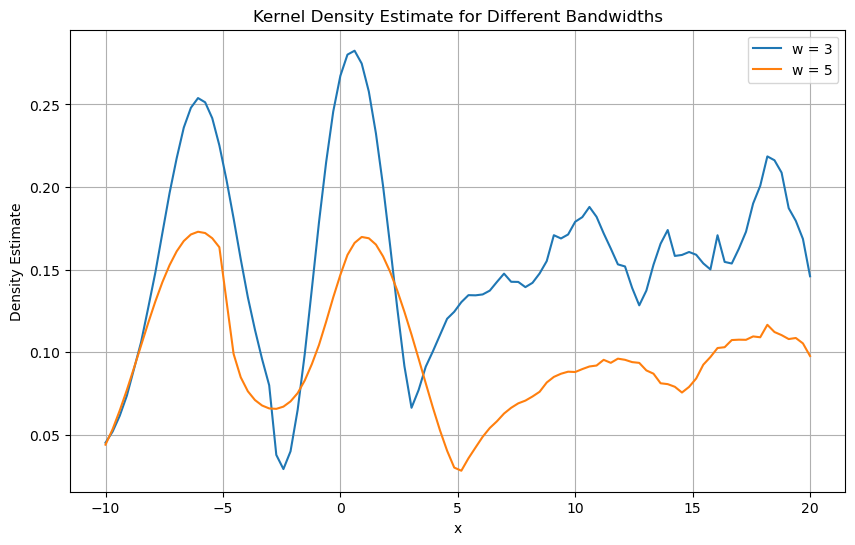

In [ ]:
bandwidths = [3, 5]

plt.figure(figsize=(10, 6))
for w in bandwidths:
    kde_values = [kde(x, data, w) for x in x_values]
    plt.plot(x_values, kde_values, label=f'w = {w}')

plt.xlabel('x')
plt.ylabel('Density Estimate')
plt.title('Kernel Density Estimate for Different Bandwidths')
plt.legend()
plt.grid(True)
plt.show()

More datapoints add more values to the densities. In the cases of $w=3$ and $w=5$ the densities became less spiky.

## 3 Mean-Shift

(a) For $\alpha_j^t = \frac{1}{2}$ the gradient step corresponds to updates to the local mean of the difference $x_i-x_j^t$. This is a sensible choice as it minimizes the distance $x_i-x_j^t$. Threfore it moves $x_j$ directly towards the mean of the distribution which is a fixed point of this sequence.

(b)

In [102]:
# TODO: implement the update to the local mean

def mean_shift_step(x, xt, r=1):
    """
    A single step of mean shift, moving every point in xt to the local mean of points in x within a radious of r.
    
    Parameters
    ----------
    x : np.ndarray
        Array of points underlying the KDE, shape (d, N1)
    xt : np.ndarray
        Current state of the mean shift algorithm, shape (d, N2)
    n_components : int, optional
        Number of requested components. By default returns all components.
        
    Returns
    -------
    np.ndarray
        the points after the mean-shift step
    """
    # NOTE: For the excercise you only need to implement this for d == 1. 
    #       If you want some extra numpy-practice, implement it for arbitrary dimension
    
    assert xt.shape[0] == x.shape[0], f'Shape mismatch: {x.shape[0]}!={xt.shape[0]}'
    
    # TODO: start by computing a N by N matrix 'dist' of distances, 
    #       such that dists[i, j] is the distance between x[i] and xt[j]
    x_reshaped = x[:, np.newaxis]
    xt_reshaped = xt[np.newaxis, :]
    dist = x_reshaped-xt_reshaped
    mask = np.abs(dist) < r
    local_means = np.nanmean(np.where(mask, dist, np.nan),axis=0)
    
    return local_means
    

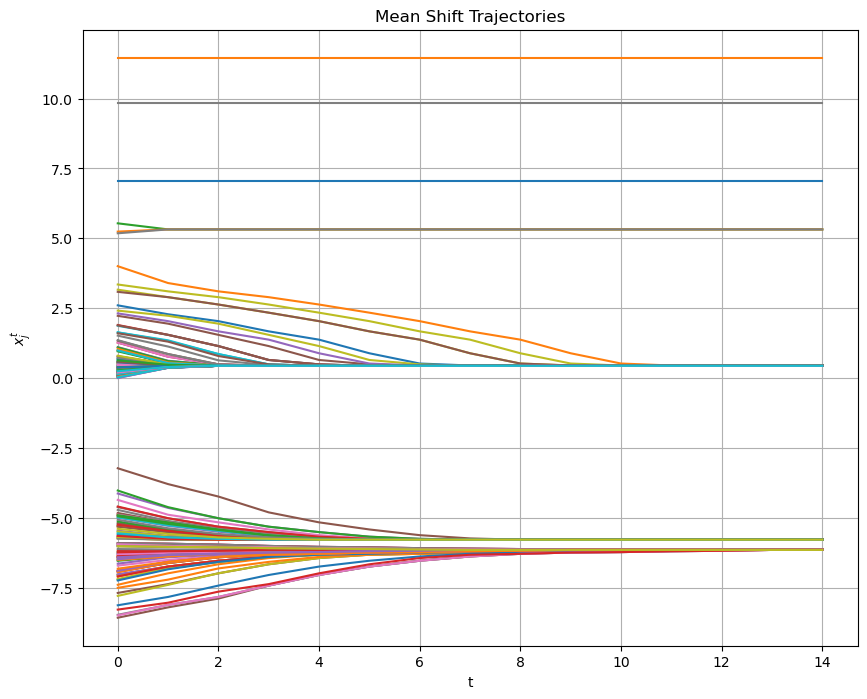

Unique $x^t$: [-6.14867943 -5.78314475  0.43767061  5.31920715  7.03753737  9.85259047
 11.46206139]


In [113]:
# load the data
data = np.load("data/samples.npy")
x = data[:200]  # use e.g. the first 200 points
xt = x

trajectories = [xt]
max_steps = 100
for step in range(max_steps):
    
    # TODO: update xt with your mean shift step
    xt = xt + mean_shift_step(x, xt)
    
    trajectories.append(xt)
    if np.allclose(trajectories[-1], trajectories[-2]):  # break in case of convergence
        break
trajectories = np.stack(trajectories)
n_steps = len(trajectories) - 1


# TODO: plot the trajectories
plt.figure(figsize=(10, 8))
for i in range(trajectories.shape[1]):
    plt.plot(trajectories[:,i])
plt.title('Mean Shift Trajectories')
plt.xlabel('t')
plt.ylabel('$x_j^t$')
plt.grid()
plt.show()
cluster_means = np.unique(trajectories[n_steps])
print(f"Unique $x^t$: {cluster_means}")

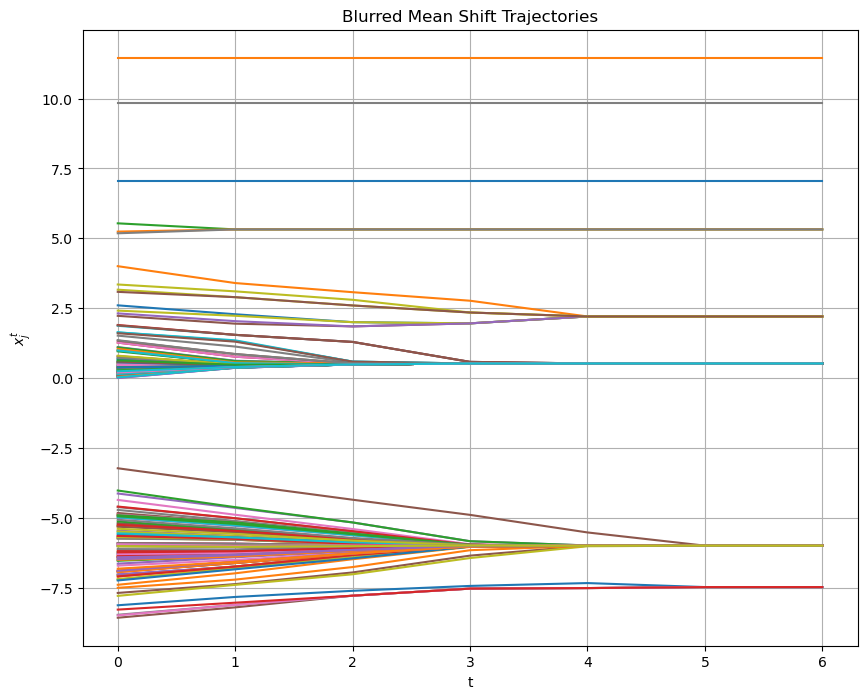

Unique $x^t$: [-7.4781409  -5.99590454  0.52258634  2.20433551  5.31920715  7.03753737
  9.85259047 11.46206139]


In [122]:
# TODO: repeat the above for "blurring" mean shift
xt = x

trajectories = [xt]
max_steps = 100
for step in range(max_steps):
    
    # TODO: update xt with your mean shift step
    xt = xt + mean_shift_step(xt, xt)
    
    trajectories.append(xt)
    if np.allclose(trajectories[-1], trajectories[-2]):  # break in case of convergence
        break
trajectories = np.stack(trajectories)
n_steps = len(trajectories) - 1


# TODO: plot the trajectories
plt.figure(figsize=(10, 8))
for i in range(trajectories.shape[1]):
    plt.plot(trajectories[:,i])
plt.title('Blurred Mean Shift Trajectories')
plt.xlabel('t')
plt.ylabel('$x_j^t$')
plt.grid()
plt.show()
cluster_means_blurred = np.unique(trajectories[n_steps])
print(f"Unique $x^t$: {cluster_means_blurred}")

Text(0.5, 0, 'number of cluster')

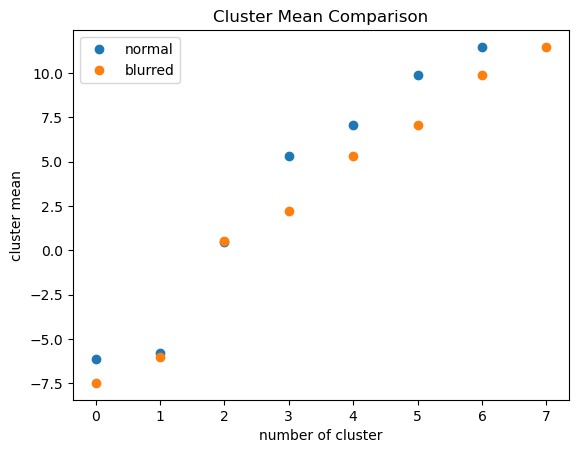

In [123]:
# compare cluster means
plt.plot(cluster_means, label="normal", linestyle='None', marker='o')
plt.plot(cluster_means_blurred, label="blurred", linestyle='None', marker='o')
plt.legend()
plt.title("Cluster Mean Comparison")
plt.ylabel("cluster mean")
plt.xlabel("number of cluster")

The blurred mean shift has 8 clusters and the non blurred has 7. Most of the clusters have similar means. Only the zeroth and third cluster of the blurred version have no matches. The zeroth and the first cluster of the normal version correspond to the first cluster of the blurred version. Further, the blurred mean shift converges after 6 steps insted of 14 steps. 

## 4 Bonus: On KDE Bandwidth and Modes

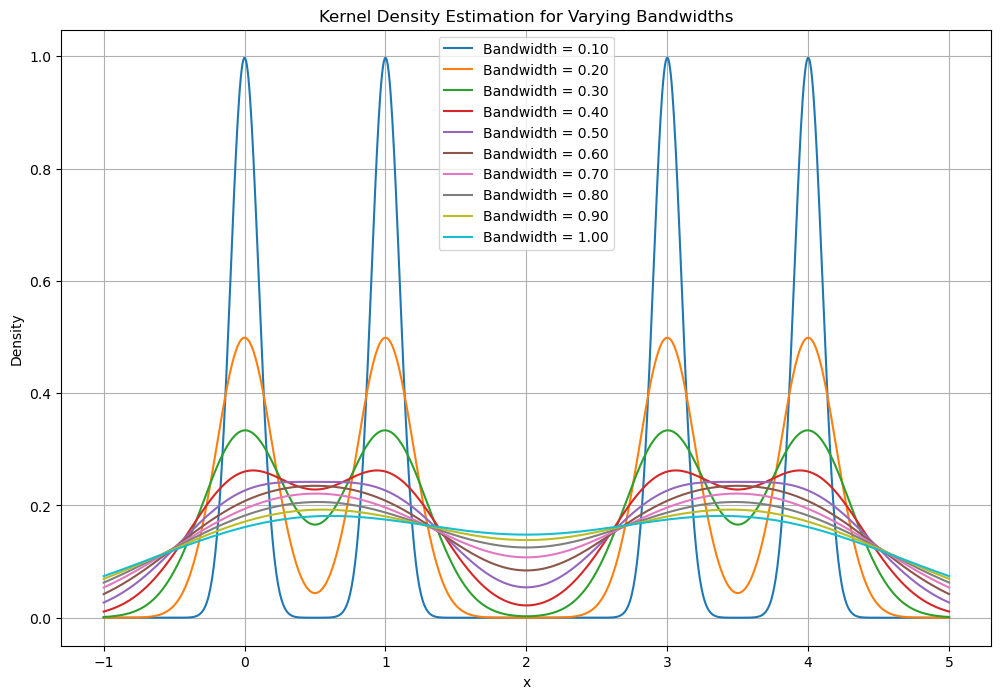

In [159]:
def gaussian_kde(x, data, bandwidth):
    n = len(data)
    density = np.zeros_like(x)
    for point in data:
        kernel = np.exp(-0.5 * ((x - point) / bandwidth) ** 2) / (bandwidth * np.sqrt(2 * np.pi))
        density += kernel
    density /= n
    return density

data = np.array([0,1,3,4])

bandwidths = np.linspace(0.1, 1.0, 10)

plt.figure(figsize=(12, 8))

x_plot = np.linspace(-1, 5, 1000)


for w in bandwidths:
    y_plot = gaussian_kde(x_plot, data, w)
    plt.plot(x_plot, y_plot, label=f'Bandwidth = {w:.2f}')


plt.title('Kernel Density Estimation for Varying Bandwidths')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()



could not find a dataset where the statement is disproven

## 5 Linear Regression: Heteroscedastic Noise

The sum of squares problem SSQ adapts to the weighted sum of squares problem in the heteroscedastic case. 
$$SSQ = (y-X^T\beta)^TW(y-X^T\beta)$$
with $W=diag(\frac{1}{\sigma_1^2}, \frac{1}{\sigma_2^2},...,\frac{1}{\sigma_N^2})$
This adaptation ensures that $x$ with higher variability contribute less.
Now minimizing $SSQ$ with respect to $\beta$:
$$\frac{\partial}{\partial\beta}((y-X^T\beta)^TW(y-X^T\beta))=0$$
$$\Leftrightarrow 2 (X^TWy-X^TWX\beta) =0$$
$$\Leftrightarrow\hat{\beta} = (X^TWX)^{-1}X^TWy$$
Calculate the expectancy:
$$E[\hat{\beta}] = E[(X^TWX)^{-1}X^TWy]$$
use $y = X\beta-\epsilon$
$$=E[(X^TWX)^{-1}X^TW(X\beta-\epsilon)]$$
$$= E[\beta - (X^TWX)^{-1}X^TW\epsilon]$$
use linearity of $E$ and $E[\epsilon]=0$
$$= \beta $$
This results in the same result as in the homoscedastic case.

Calculate Covariance $\text{Cov}(\hat{\bm{\beta}})$:

Substituting $$\hat{\bm{\beta}} = (X^T W X)^{-1} X^T W \bm{y}$$, we get:

$$\text{Cov}(\hat{\bm{\beta}}) = (X^T W X)^{-1} X^T W \, \text{Cov}(\bm{y}) \, W X (X^T W X)^{-1}$$

Since $$\text{Cov}(\bm{y}) = \text{Cov}(X \bm{\beta} + \bm{\epsilon}) = \text{Cov}(\bm{\epsilon}) = W^{-1}$$ , we substitute this into the expression:

$$\text{Cov}(\hat{\bm{\beta}}) = (X^T W X)^{-1} X^T W W^{-1} W X (X^T W X)^{-1}$$

This simplifies to:

$$\text{Cov}(\hat{\bm{\beta}}) = (X^T W X)^{-1}$$

This result is also similar to the homoscedastic case except for the different variances at the corresponding places.


